In [41]:
company = 'BILI'
freq = 'daily'
path = company + "_" + freq + ".csv"
!python3 save_data_to_csv.py $company $freq

BILI daily
            1. open   2. high    3. low  4. close  5. volume
date                                                        
2021-01-27  122.170  125.0700  116.3400    120.43  7901399.0
2021-01-26  134.870  134.8700  124.6600    126.00  5582646.0
2021-01-25  142.550  144.4600  129.4300    134.27  8581215.0
2021-01-22  123.470  134.0700  122.8000    133.75  6806508.0
2021-01-21  129.150  130.5000  121.7650    123.88  5942340.0
2021-01-20  134.300  137.3474  127.3300    127.80  6129799.0
2021-01-19  127.690  134.2800  126.3700    127.88  7757098.0
2021-01-15  125.470  126.7100  120.0000    122.63  4520275.0
2021-01-14  121.845  129.4000  121.3100    123.22  8001981.0
2021-01-13  115.240  120.9300  113.2335    119.31  3608594.0


In [42]:
!python3 tech_ind_model.py $company $freq

2021-01-28 10:13:45.809299: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-01-28 10:13:45.809367: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
(596, 50, 5)
(67, 50, 5)
2021-01-28 10:13:48.122315: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-01-28 10:13:48.122688: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-01-28 10:13:48.122748: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-01-28 10:13:48.122809: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does 

17/17 [==============================] - 1s 33ms/step - loss: 1.8485e-04 - val_loss: 6.1513e-05
Epoch 60/200
17/17 [==============================] - 1s 32ms/step - loss: 2.1660e-04 - val_loss: 5.3675e-05
Epoch 61/200
17/17 [==============================] - 1s 31ms/step - loss: 1.7083e-04 - val_loss: 5.2455e-05
Epoch 62/200
17/17 [==============================] - 1s 32ms/step - loss: 1.9247e-04 - val_loss: 5.3182e-05
Epoch 63/200
17/17 [==============================] - 1s 32ms/step - loss: 1.8008e-04 - val_loss: 5.2636e-05
Epoch 64/200
17/17 [==============================] - 1s 33ms/step - loss: 2.0116e-04 - val_loss: 5.1448e-05
Epoch 65/200
17/17 [==============================] - 1s 32ms/step - loss: 1.8710e-04 - val_loss: 5.7212e-05
Epoch 66/200
17/17 [==============================] - 1s 32ms/step - loss: 1.9728e-04 - val_loss: 5.2669e-05
Epoch 67/200
17/17 [==============================] - 1s 32ms/step - loss: 1.5224e-04 - val_loss: 5.3386e-05
Epoch 68/200
17/17 [============

17/17 [==============================] - 1s 32ms/step - loss: 1.5452e-04 - val_loss: 4.6428e-05
Epoch 135/200
17/17 [==============================] - 1s 33ms/step - loss: 1.6697e-04 - val_loss: 5.4330e-05
Epoch 136/200
17/17 [==============================] - 1s 32ms/step - loss: 1.7025e-04 - val_loss: 6.5104e-05
Epoch 137/200
17/17 [==============================] - 1s 32ms/step - loss: 1.9451e-04 - val_loss: 4.3520e-05
Epoch 138/200
17/17 [==============================] - 1s 33ms/step - loss: 1.2839e-04 - val_loss: 8.2832e-05
Epoch 139/200
17/17 [==============================] - 1s 33ms/step - loss: 1.6930e-04 - val_loss: 5.1100e-05
Epoch 140/200
17/17 [==============================] - 1s 32ms/step - loss: 1.6743e-04 - val_loss: 4.4930e-05
Epoch 141/200
17/17 [==============================] - 1s 32ms/step - loss: 1.2875e-04 - val_loss: 4.4646e-05
Epoch 142/200
17/17 [==============================] - 1s 33ms/step - loss: 1.5384e-04 - val_loss: 4.4360e-05
Epoch 143/200
17/17 [===

In [43]:
import numpy as np
from keras.models import load_model
from util import csv_to_dataset, history_points

model = load_model('technical_model' + company + "_" + freq + '.h5')

ohlcv_histories, technical_indicators, next_day_open_values, unscaled_y, y_normaliser = csv_to_dataset(path)

test_split = 0.9
n = int(ohlcv_histories.shape[0] * test_split)

ohlcv_train = ohlcv_histories[:n]
tech_ind_train = technical_indicators[:n]
y_train = next_day_open_values[:n]

ohlcv_test = ohlcv_histories[n:]
tech_ind_test = technical_indicators[n:]
y_test = next_day_open_values[n:]

unscaled_y_test = unscaled_y[n:]

y_test_predicted = model.predict([ohlcv_test, tech_ind_test])
y_test_predicted = y_normaliser.inverse_transform(y_test_predicted)

buys = []
sells = []
thresh = 0.1

start = 0
end = -1

x = -1

<AxesSubplot:xlabel='Date'>

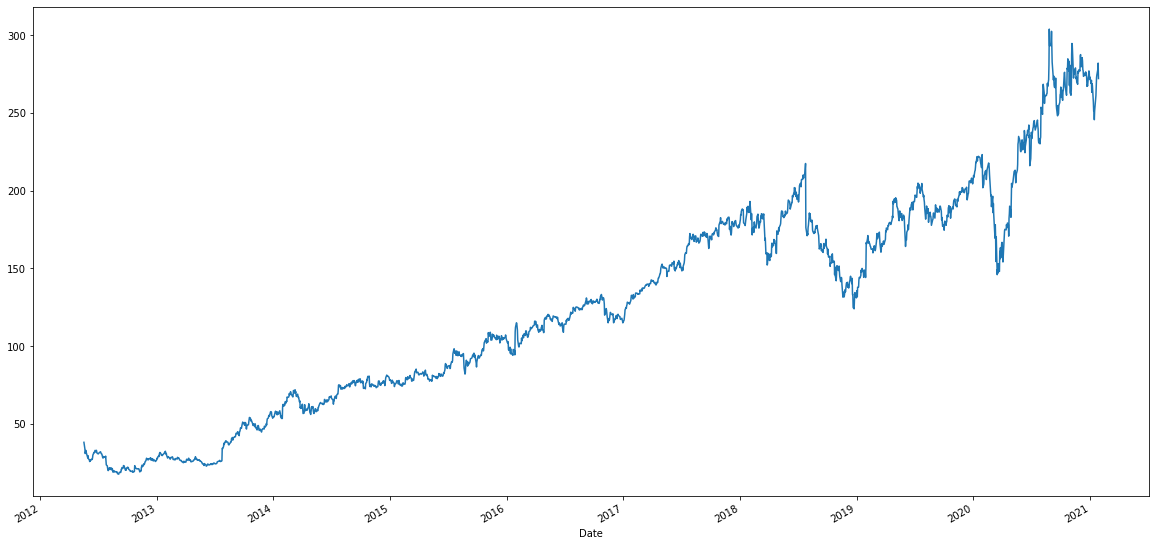

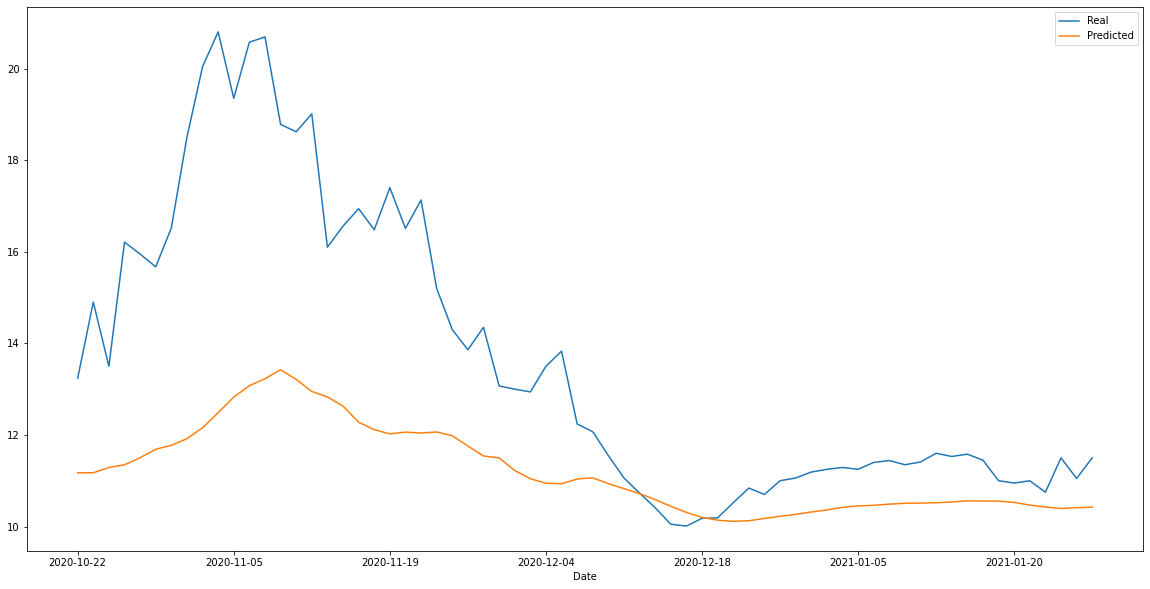

In [49]:
import pandas as pd
from yfinance import yfinance as yf
msft = yf.Ticker("FB")
# get stock info
msft.info
# get historical market data
hist = msft.history(period="max")
hist['Close'].plot(y="Close", use_index=True, figsize=(20,10))




data = pd.read_csv(path)['date'].tolist()
dates = data[0:len(unscaled_y_test[start:end])]
dates.reverse()
dataframe = {'Date': dates,
        'Real': [x[0] for x in unscaled_y_test[start:end].tolist()],
        'Predicted': [x[0] for x in y_test_predicted[start:end].tolist()]}
df = pd.DataFrame(dataframe, columns=['Date', 'Real', 'Predicted'])
df.plot(x ='Date', y=['Real', 'Predicted'], kind = 'line', figsize=(20,10))

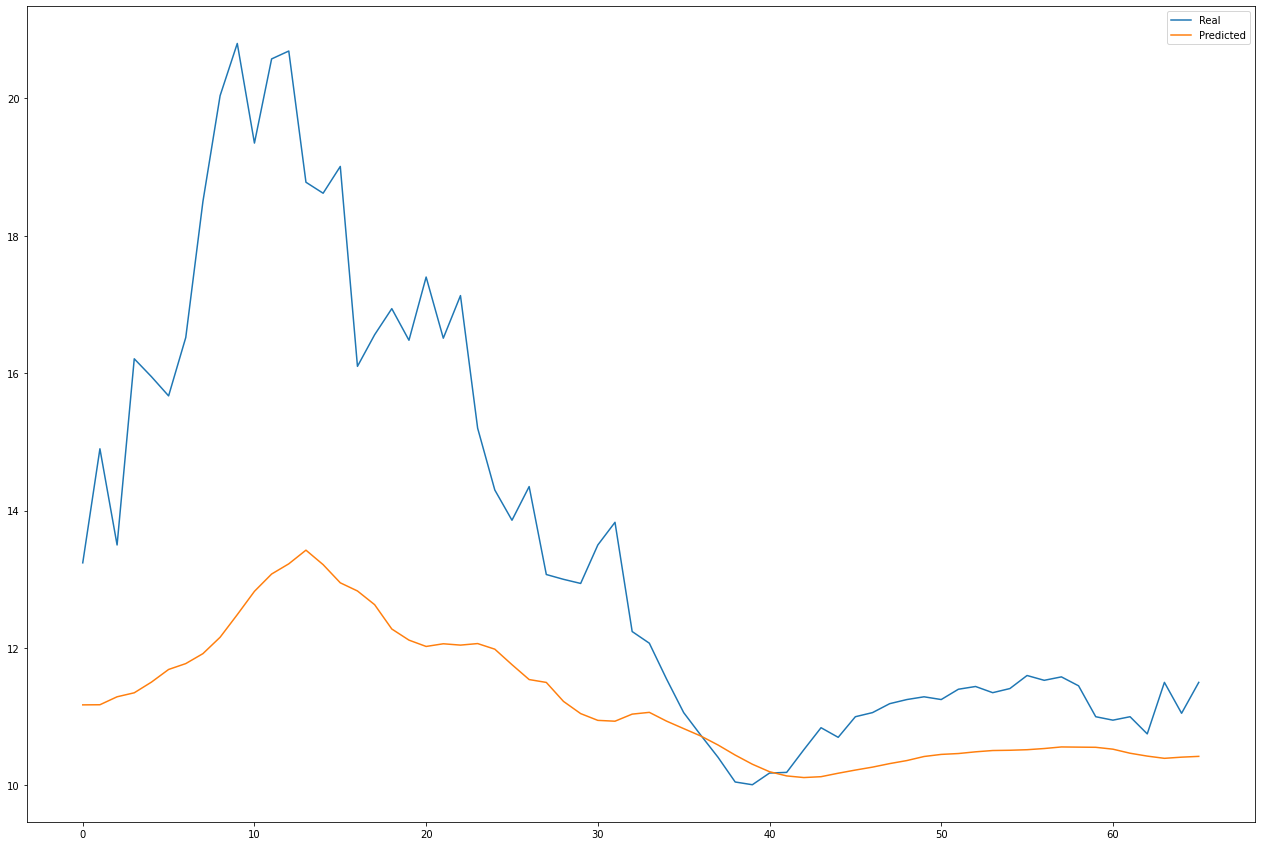

In [45]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(22, 15, forward=True)

real = plt.plot(unscaled_y_test[start:end], label='real')
pred = plt.plot(y_test_predicted[start:end], label='predicted')

plt.legend(['Real', 'Predicted'])

plt.show()